In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import time


In [25]:


def scrape_github_trending_forks(pages=5):
    base_url = "https://github.com/trending?since=monthly&spoken_language_code="
    languages = []
    forks = []

    for page in range(1, pages + 1):
        url = f"{base_url}&page={page}"
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Failed to fetch page {page}: {response.status_code}")
            continue

        soup = BeautifulSoup(response.content, 'html.parser')
        repos = soup.find_all('article', class_='Box-row')

        for repo in repos:
            lang = repo.find('span', itemprop='programmingLanguage')
            languages.append(lang.text.strip() if lang else 'Unknown')

            fork_element = repo.select_one('a[href$="/forks"]')
            if fork_element:
                 fork_count = fork_element.text.strip().replace(',', '')
                 forks.append(int(fork_count) if fork_count.isdigit() else 0)
            else:
                 forks.append(0)


        time.sleep(2)

    return languages, forks

In [26]:
languages, forks = scrape_github_trending_forks()


In [27]:
data = pd.DataFrame({'Language': languages, 'Forks': forks})


In [28]:
data.head(5)

,Language,Forks
0,Python,1193
1,Python,831
2,TypeScript,1806
3,Python,824
4,Jupyter Notebook,1109


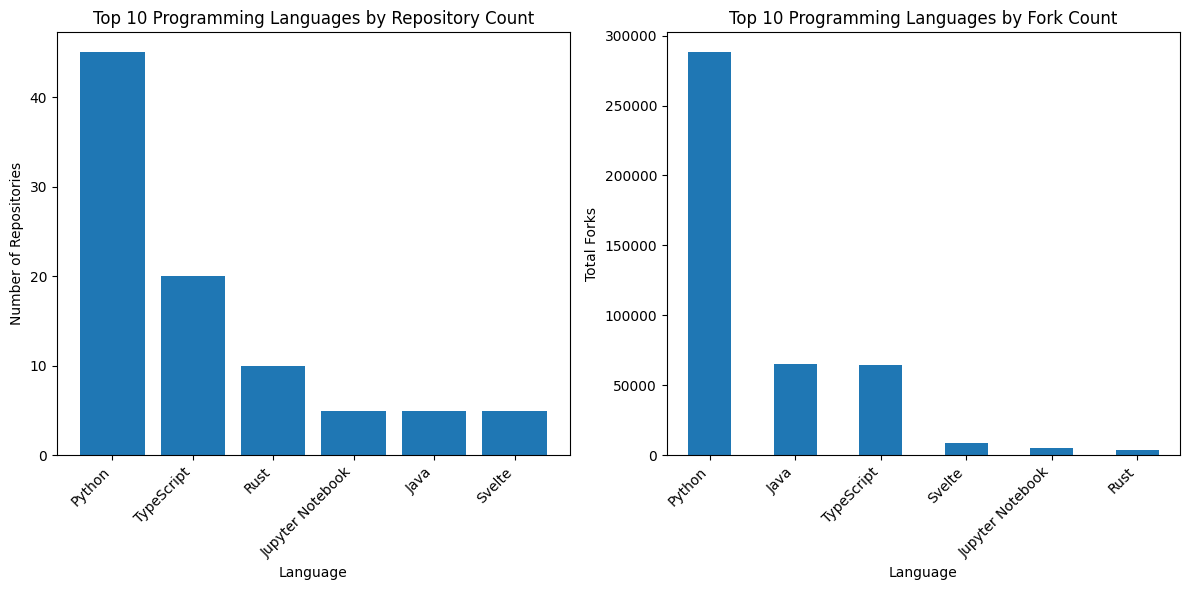

In [29]:
language_counts = Counter(languages)
top_languages = dict(language_counts.most_common(10))

language_popularity = data.groupby('Language')['Forks'].sum().sort_values(ascending=False).head(10)

# Data Visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(top_languages.keys(), top_languages.values())
plt.title('Top 10 Programming Languages by Repository Count')
plt.xlabel('Language')
plt.ylabel('Number of Repositories')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
language_popularity.plot(kind='bar')
plt.title('Top 10 Programming Languages by Fork Count')
plt.xlabel('Language')
plt.ylabel('Total Forks')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [31]:

# Insights Generation
total_repos = sum(language_counts.values())
total_forks = data['Forks'].sum()

print(f"Total repositories analyzed: {total_repos}")
print(f"Total forks across all repositories: {total_forks}")
print("\nTop 5 languages by repository count:")
for lang, count in list(language_counts.most_common(5)):
    percentage = (count / total_repos) * 100
    print(f"{lang}: {count} repositories ({percentage:.2f}%)")

print("\nTop 5 languages by fork count:")
for lang, forks in language_popularity.head().items():
    percentage = (forks / total_forks) * 100
    print(f"{lang}: {forks} forks ({percentage:.2f}%)")

Total repositories analyzed: 90
Total forks across all repositories: 435775

Top 5 languages by repository count:
Python: 45 repositories (50.00%)
TypeScript: 20 repositories (22.22%)
Rust: 10 repositories (11.11%)
Jupyter Notebook: 5 repositories (5.56%)
Java: 5 repositories (5.56%)

Top 5 languages by fork count:
Python: 287900 forks (66.07%)
Java: 65455 forks (15.02%)
TypeScript: 64310 forks (14.76%)
Svelte: 8680 forks (1.99%)
Jupyter Notebook: 5545 forks (1.27%)
